# **Email detection as either Spam or not**

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [6]:
df= pd.read_csv("./data/email.csv")

# **Preprocessing OR Data Cleaning**

In [7]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5573 non-null   object
 1   Message   5573 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


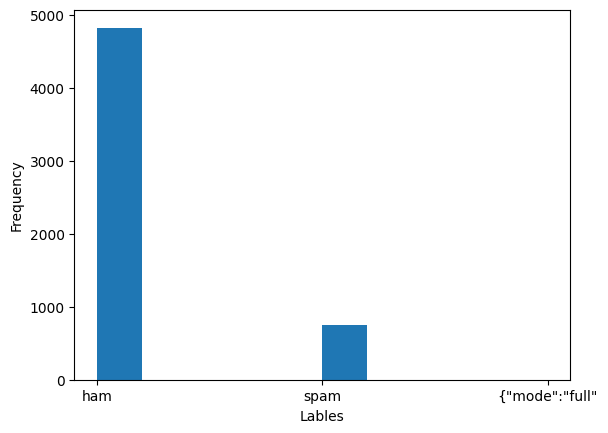

In [9]:
plt.hist(df['Category'],bins=10)
plt.xlabel("Lables")
plt.ylabel("Frequency");
plt.show()

In [10]:
df['Category'].unique()

array(['ham', 'spam', '{"mode":"full"'], dtype=object)

In [11]:
df=df[df['Category'].isin(["ham","spam"])]

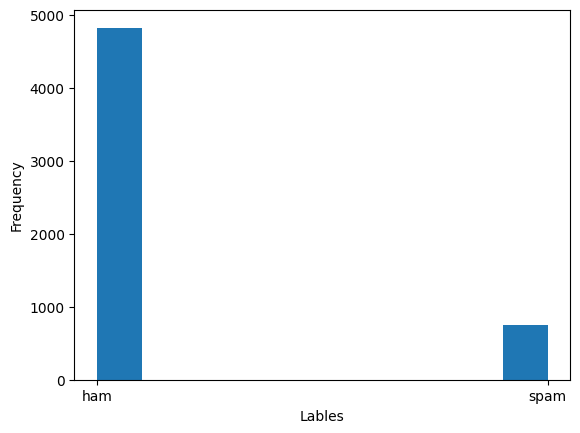

In [39]:
plt.hist(df['Category'])
plt.xlabel("Lables")
plt.ylabel("Frequency");
plt.show()

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.isnull().sum()

,0
Category,0
Message,0


In [16]:
df['Category'].unique()

array(['ham', 'spam'], dtype=object)

In [17]:
df.shape

(5572, 2)

In [18]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# **Splitting of Feature and target**

In [27]:
target=df['Category']
features=df['Message']

In [28]:
target.shape,features.shape

((5572,), (5572,))

# **Label Encoder**

In [30]:
target.head()

,Category
0,ham
1,ham
2,spam
3,ham
4,ham


In [31]:
encoder=LabelEncoder()
target=encoder.fit_transform(target)
target


array([0, 0, 1, ..., 0, 0, 0])

In [32]:
np.unique(target)

array([0, 1])

# **Split data into training and testing sets**

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [38]:
X_train.shape, X_test.shape

((3900,), (1672,))

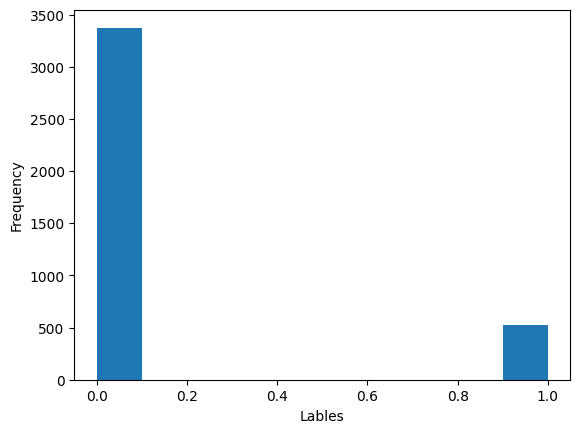

In [42]:
plt.hist(y_train)
plt.xlabel("Lables")
plt.ylabel("Frequency");
plt.show()

# **Convert text data to numerical features using TF-IDF**

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [46]:
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# **Model Training and Evaluating**

In [47]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns

In [89]:

def model_train_test(model):

  model.fit(X_train_tfidf, y_train)

  y_pred = model.predict(X_test_tfidf)

  # Evaluate the model
  print("Accuracy:", accuracy_score(y_test, y_pred))
  print(classification_report(y_test, y_pred))

  # Confusion matrix
  cm = confusion_matrix(y_test, y_pred)

  # Plot the heatmap
  plt.figure(figsize=(8, 6))
  ax=sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])

  plt.title("Confusion Matrix")
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")

  ax.xaxis.set_label_position('top')
  ax.xaxis.set_ticks_position('top')

  plt.show()


# **Naive Bayes**

Accuracy: 0.9617224880382775
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1448
           1       1.00      0.71      0.83       224

    accuracy                           0.96      1672
   macro avg       0.98      0.86      0.91      1672
weighted avg       0.96      0.96      0.96      1672



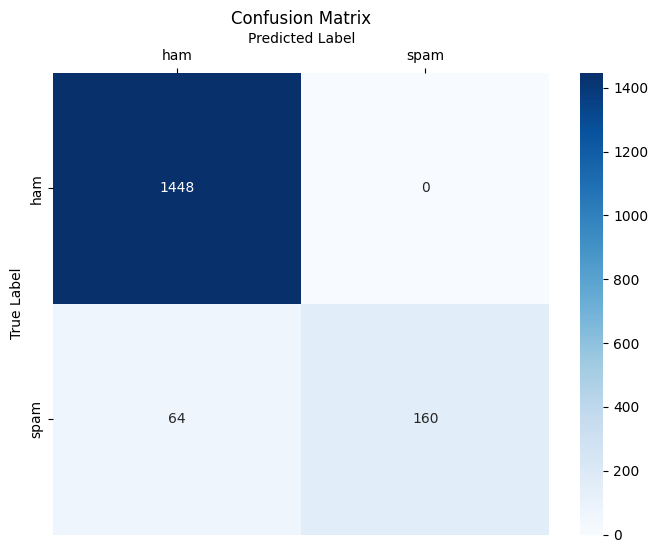

In [90]:
model_train_test(MultinomialNB())

# **DecisionTreeClassifier**

Accuracy: 0.9665071770334929
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1448
           1       0.92      0.83      0.87       224

    accuracy                           0.97      1672
   macro avg       0.94      0.91      0.92      1672
weighted avg       0.97      0.97      0.97      1672



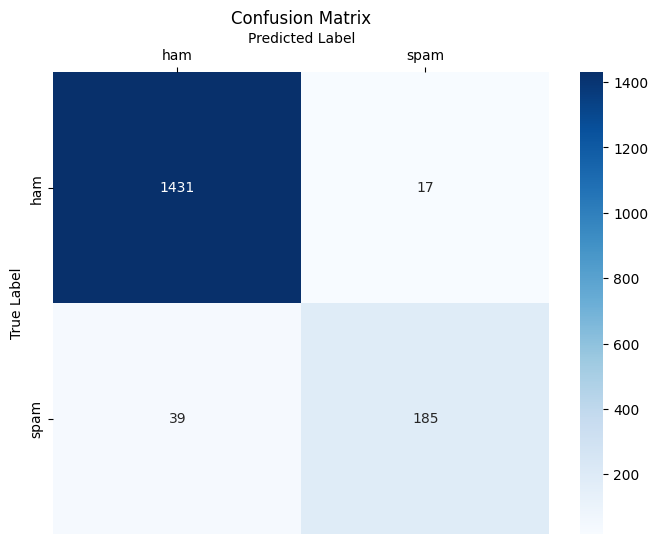

In [91]:
model_train_test(DecisionTreeClassifier())